<a href="https://colab.research.google.com/github/manuel1729/Investigacion-de-operaciones/blob/main/Proyecto_PERT_CPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Planificación de una boda**

Gómez Cruz Manuel y Vilchis García Karla Ivonne

---


Actividades a realizar en menos de 73 días para una boda.

\
\begin{array}{|l|p{6cm}|}
\hline
\textbf{Actividad} & \textbf{Descripción de la Actividad}  & \textbf{predecesor inmediato} & \textbf{Tiempo(días)}\\
\hline
\text{A} & \text{Planificación (Wedding Planner)} & \text{---} & \text{5}\\
\hline
\text{B} & \text{Elaborar lista de invitados} & \text{C} & \text{7}\\
\hline
\text{C} & \text{Reservar de lugar} & \text{A} & \text{10}\\
\hline
\text{D} & \text{Reservar iglesia o Juez} & \text{C} & \text{4}\\
\hline
\text{E} & \text{Seleccionar catering} & \text{A} & \text{8}\\
\hline
\text{F} & \text{Enviar o entregar invitaciones} & \text{B,D} & \text{3}\\
\hline
\text{G} & \text{Pruebas de vestido y traje} & \text{A} & \text{20}\\
\hline
\text{H} & \text{Contratar fotógrafo} & \textbf{A} & \textbf{5}\\
\hline
\text{I} & \text{Diseño y compra de decoración} & \textbf{C} & \textbf{7}\\
\hline
\text{J} & \text{Ensayo general} & \text{L,H,G} & \text{1}\\
\hline
\text{K} & \text{Rompehielo} & \text{F} & \text{1}\\
\hline
\text{L} & \text{Montaje recepción y catering} & \text{I, E} & \text{2}\\
\hline
\end{array}
\
Procedemos a obtener la ruta crítica


In [ ]:
#importamos las paqueterías necesarias
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
#diccionario de los nodos, su peso y sus predecesores
act = {
    'Inicio': {'name': 'Inicio', 'dur': 0, 'pred': []},
    'A': {'name': 'A', 'dur': 5, 'pred': ['Inicio']},
    'B': {'name': 'B', 'dur': 7, 'pred': ['C']},
    'C': {'name': 'C', 'dur': 10, 'pred': ['A']},
    'D': {'name': 'D', 'dur': 4, 'pred': ['C']},
    'E': {'name': 'E', 'dur': 8, 'pred': ['A']},
    'F': {'name': 'F', 'dur': 3, 'pred': ['D', 'B']},
    'G': {'name': 'G', 'dur': 20, 'pred': ['A']},
    'H': {'name': 'H', 'dur': 5, 'pred': ['A']},
    'I': {'name': 'I', 'dur': 7, 'pred': ['C']},
    'J': {'name': 'J', 'dur': 1, 'pred': ['G', 'H', 'L']},
    'K': {'name': 'K', 'dur': 1, 'pred': ['F']},
    'L': {'name': 'L', 'dur': 2, 'pred': ['E', 'I']},
    'Fin': {'name': 'Fin', 'dur': 0, 'pred': ['K', 'J']}
}

In [ ]:
# Crear el grafo dirigido
G = nx.DiGraph()

# Agregar nodos con atributos
for act_id, act_data in act.items():
    G.add_node(act_id, name=act_data['name'], dur=act_data['dur'])

# Agregar aristas basadas en los predecesores
for act_id, act_data in act.items():
    for pred in act_data['pred']:
        G.add_edge(pred, act_id)

# Calcular la ruta crítica usando el método CPM (Critical Path Method)
def calcular_ruta_critica(grafo, act):
    # Calcular tiempos early (forward pass)
    early_start = {}
    early_finish = {}

    # Orden topológico
    orden_topologico = list(nx.topological_sort(grafo))

    for node in orden_topologico:
        if not list(grafo.predecessors(node)):  # Sin predecesores
            early_start[node] = 0
        else:
            early_start[node] = max(early_finish[pred] for pred in grafo.predecessors(node))
        early_finish[node] = early_start[node] + act[node]['dur']

    # Calcular tiempos late (backward pass)
    late_finish = {}
    late_start = {}

    # Orden inverso
    orden_inverso = list(reversed(orden_topologico))
    duracion_proyecto = early_finish['Fin']

    for node in orden_inverso:
        if not list(grafo.successors(node)):  # Sin sucesores
            late_finish[node] = duracion_proyecto
        else:
            late_finish[node] = min(late_start[succ] for succ in grafo.successors(node))
        late_start[node] = late_finish[node] - act[node]['dur']

    # Calcular holgura y identificar ruta crítica
    holgura = {}
    ruta_critica = []

    for node in grafo.nodes():
        holgura[node] = late_start[node] - early_start[node]
        if abs(holgura[node]) < 0.001:  # Usar tolerancia para floats
            ruta_critica.append(node)

    return early_start, early_finish, late_start, late_finish, holgura, ruta_critica

# Calcular la ruta crítica
early_start, early_finish, late_start, late_finish, holgura, ruta_critica = calcular_ruta_critica(G, act)

# Mostrar resultados de la ruta crítica
print("ANÁLISIS DE RUTA CRÍTICA")
print("-" * 60)
print(f"{'Actividad':<8} {'ES':<4} {'EF':<4} {'LS':<4} {'LF':<4} {'Holgura':<8} {'Crítica':<8}")
print("-" * 60)

for act_id in G.nodes():
    es = early_start[act_id]
    ef = early_finish[act_id]
    ls = late_start[act_id]
    lf = late_finish[act_id]
    h = holgura[act_id]
    critica = "SÍ" if abs(h) < 0.001 else "No"
    print(f"{act_id:<8} {es:<4} {ef:<4} {ls:<4} {lf:<4} {h:<8} {critica:<8}")

ANÁLISIS DE RUTA CRÍTICA
------------------------------------------------------------
Actividad ES   EF   LS   LF   Holgura  Crítica 
------------------------------------------------------------
Inicio   0    0    0    0    0        SÍ      
A        0    5    0    5    0        SÍ      
B        15   22   15   22   0        SÍ      
C        5    15   5    15   0        SÍ      
D        15   19   18   22   3        No      
E        5    13   15   23   10       No      
F        22   25   22   25   0        SÍ      
G        5    25   5    25   0        SÍ      
H        5    10   20   25   15       No      
I        15   22   16   23   1        No      
J        25   26   25   26   0        SÍ      
K        25   26   25   26   0        SÍ      
L        22   24   23   25   1        No      
Fin      26   26   26   26   0        SÍ      



RUTA CRÍTICA 1: Inicio → A → C → B → F → K → Fin

RUTA CRÍTICA 2: Inicio → A → G → J → Fin

Duración total del proyecto: 26 días


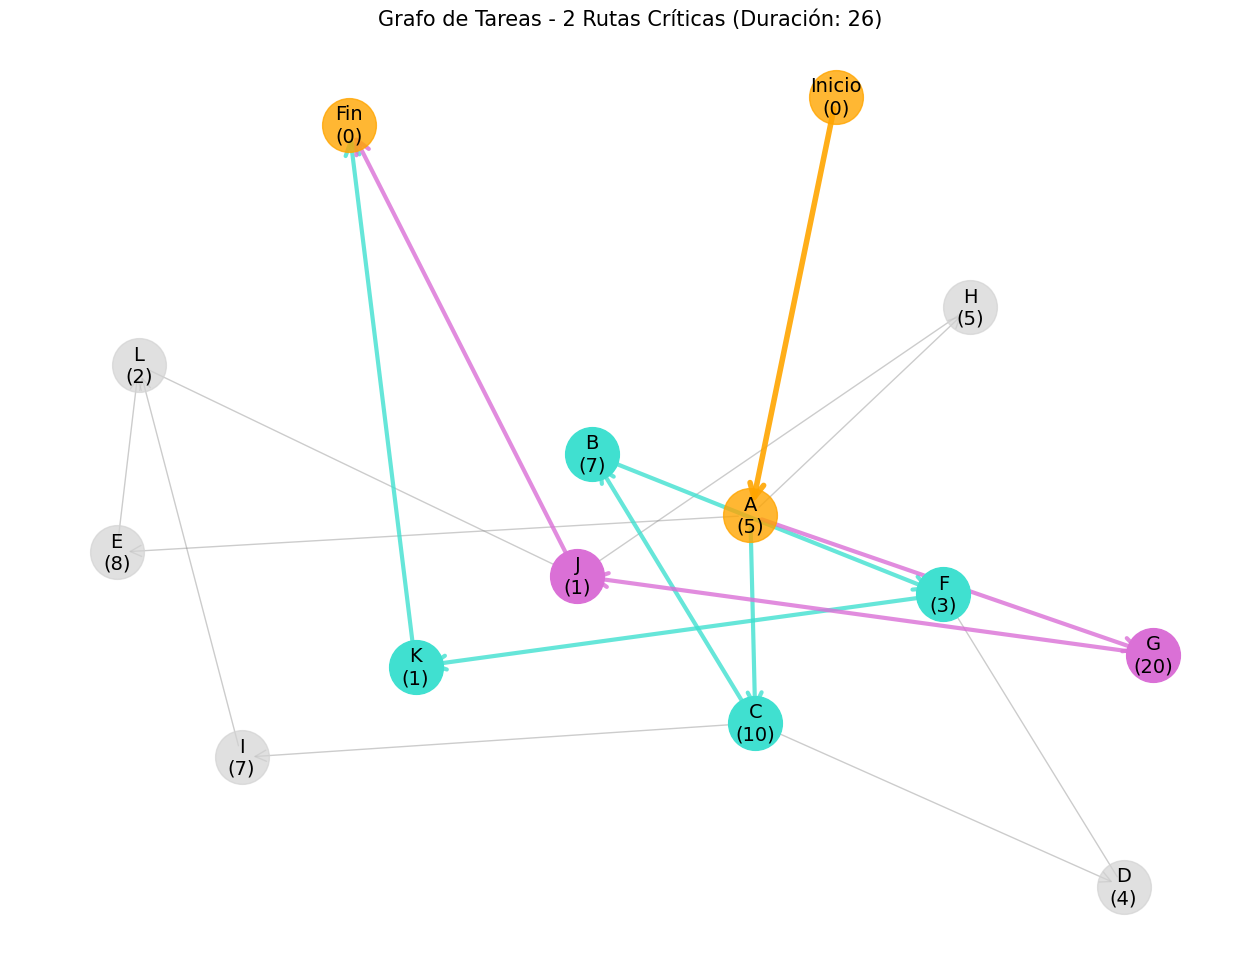

In [ ]:
# Encontrar las rutas críticas específicas
def encontrar_rutas_criticas(grafo, ruta_critica, early_start, early_finish):
    # Definir las dos rutas críticas
    ruta1 = ['Inicio', 'A', 'C', 'B', 'F', 'K', 'Fin']
    ruta2 = ['Inicio', 'A', 'G', 'J', 'Fin']

    # Encontrar aristas para cada ruta
    aristas_ruta1 = []
    for i in range(len(ruta1) - 1):
        if grafo.has_edge(ruta1[i], ruta1[i + 1]):
            aristas_ruta1.append((ruta1[i], ruta1[i + 1]))

    aristas_ruta2 = []
    for i in range(len(ruta2) - 1):
        if grafo.has_edge(ruta2[i], ruta2[i + 1]):
            aristas_ruta2.append((ruta2[i], ruta2[i + 1]))

    return ruta1, ruta2, aristas_ruta1, aristas_ruta2

# Encontrar rutas y aristas críticas
ruta1, ruta2, aristas_ruta1, aristas_ruta2 = encontrar_rutas_criticas(G, ruta_critica, early_start, early_finish)

print(f"\nRUTA CRÍTICA 1: {' → '.join(ruta1)}")
print(f"\nRUTA CRÍTICA 2: {' → '.join(ruta2)}")
print(f"\nDuración total del proyecto: {early_finish['Fin']} días")

# Visualizar el grafo con las dos rutas críticas en colores diferentes
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, k=2, iterations=100)

# Identificar nodos correctamente
nodos_compartidos = ['Inicio', 'A', 'Fin']  # Solo estos dos son compartidos
nodos_ruta1_exclusivos = ['C', 'B', 'F', 'K']  # Solo de ruta 1
nodos_ruta2_exclusivos = ['G', 'J']  # Solo de ruta 2
nodos_no_criticos = [n for n in G.nodes() if n not in ruta1 and n not in ruta2]

# Dibujar todos los nodos (no críticos)
nx.draw_networkx_nodes(G, pos,
                      nodelist=nodos_no_criticos,
                      node_color='lightgray',
                      node_size=1500,
                      alpha=0.7)

# Dibujar nodos compartidos (color naranja)
nx.draw_networkx_nodes(G, pos,
                      nodelist=nodos_compartidos,
                      node_color='orange',
                      node_size=1500,
                      alpha=0.8)

# Dibujar nodos exclusivos de ruta 1 (color turquesa)
nx.draw_networkx_nodes(G, pos,
                      nodelist=nodos_ruta1_exclusivos,
                      node_color='turquoise',
                      node_size=1500,
                      alpha=1)

# Dibujar nodos exclusivos de ruta 2 (color lila)
nx.draw_networkx_nodes(G, pos,
                      nodelist=nodos_ruta2_exclusivos,
                      node_color='Orchid',
                      node_size=1500,
                      alpha=1)

# Dibujar todas las aristas (no críticas)
todas_aristas = list(G.edges())
aristas_no_criticas = [e for e in todas_aristas if e not in aristas_ruta1 and e not in aristas_ruta2]

nx.draw_networkx_edges(G, pos,
                      edgelist=aristas_no_criticas,
                      edge_color='gray',
                      arrows=True,
                      arrowsize=20,
                      arrowstyle='->',
                      alpha=0.4)

# Resaltar arista compartida Inicio→A (color naranja - puente inicial)
arista_compartida = [('Inicio', 'A')]
nx.draw_networkx_edges(G, pos,
                      edgelist=arista_compartida,
                      edge_color='orange',
                      arrows=True,
                      arrowsize=25,
                      arrowstyle='->',
                      width=4,
                      alpha=0.9)

# Resaltar aristas de la ruta 1 (turquesa) excluyendo la compartida
aristas_ruta1_sin_compartida = [e for e in aristas_ruta1 if e != ('Inicio', 'A')]
nx.draw_networkx_edges(G, pos,
                      edgelist=aristas_ruta1_sin_compartida,
                      edge_color='turquoise',
                      arrows=True,
                      arrowsize=25,
                      arrowstyle='->',
                      width=3,
                      alpha=0.8)

# Resaltar aristas de la ruta 2 (lila) excluyendo la compartida
aristas_ruta2_sin_compartida = [e for e in aristas_ruta2 if e != ('Inicio', 'A')]
nx.draw_networkx_edges(G, pos,
                      edgelist=aristas_ruta2_sin_compartida,
                      edge_color='Orchid',
                      arrows=True,
                      arrowsize=25,
                      arrowstyle='->',
                      width=3,
                      alpha=0.8)

# Etiquetas personalizadas para los nodos
labels = {node: f"{data['name']}\n({data['dur']})"
          for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels, font_size=14)

plt.title(f"Grafo de Tareas - 2 Rutas Críticas (Duración: {early_finish['Fin']})", size=20)
plt.axis('off')
plt.show()

Tenemos como presupuesto inicial $500,000

\begin{array}{|l|p{6cm}|}
\hline
\textbf{Actividad} & \textbf{Tiempo(días)} & \textbf{Tiempo Quiebre}  & \textbf{costo} & \textbf{costo quiebre}\\
\hline
\text{A}  & \text{5} & \text{3} & \text{50,000} & \text{60,000}\\
\hline
\text{B} & \text{7} & \text{5} & \text{10,000} & \text{16,000} \\
\hline
\text{C} & \text{10} & \text{7} & \text{200,000} & \text{300,000} \\
\hline
\text{D} &\text{4} & \text{3} & \text{20,000} & \text{25,000}  \\
\hline
\text{E} & \text{8} & \text{6} & \text{100,000} & \text{180,000} \\
\hline
\text{F} & \text{3} & \text{2} & \text{5,000} & \text{10,000} \\
\hline
\text{G} & \text{20} & \text{15} & \text{50,000} & \text{70,000} \\
\hline
\text{H} & \textbf{5} & \text{3} & \textbf{25,000} & \text{40,000} \\
\hline
\text{I} & \textbf{7} & \text{5} & \textbf{30,000} & \text{45,000} \\
\hline
\text{J} & \text{1} & \text{1} & \text{10,000} & \text{10,000} \\
\hline
\text{K} & \text{1} & \text{1} & \text{30,000} & \text{30,000} \\
\hline
\text{L} & \text{2} & \text{1} & \text{20,000} & \text{35,000} \\
\hline
\end{array}


Para empezar el código importamos las librerias para crear tablas, nerworkx para los cálculos

In [ ]:
import pandas as pd
import numpy as np

# Datos completos
datos_actividades = {
    'Actividad': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'],
    'Predecesor': ['---', 'C', 'A', 'C', 'A', 'B,D', 'A', 'A', 'C', 'L,H,G', 'F', 'I,E'],
    'Tiempo_Normal': [5, 7, 10, 4, 8, 3, 20, 5, 7, 1, 1, 2]
}

datos_compresion = {
    'Actividad': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'],
    'Tiempo_Quiebre': [3, 5, 7, 3, 6, 2, 15, 3, 5, 1, 1, 1],
    'Costo_Normal': [50000, 10000, 200000, 20000, 100000, 5000, 50000, 25000, 30000, 10000, 30000, 35000],
    'Costo_Quiebre': [60000, 16000, 300000, 25000, 180000, 10000, 70000, 40000, 45000, 10000, 30000, 35000]
}

In [ ]:
# Crear DataFrames
df = pd.DataFrame(datos_actividades)
df_comp = pd.DataFrame(datos_compresion)

# Agregar 'Tiempo_Normal' al df_comp
df_comp['Tiempo_Normal'] = df['Tiempo_Normal']


# Calcular costos de compresión
df_comp['Dias_Compresion'] = df_comp['Tiempo_Normal'] - df_comp['Tiempo_Quiebre']
df_comp['Costo_Compresion_Dia'] = (df_comp['Costo_Quiebre'] - df_comp['Costo_Normal']) / df_comp['Dias_Compresion']
df_comp['Costo_Compresion_Dia'] = df_comp['Costo_Compresion_Dia'].round(0)

print("=== ANÁLISIS DE COMPRESIÓN COMPLETO ===")
print(df_comp[['Actividad', 'Tiempo_Normal', 'Tiempo_Quiebre', 'Dias_Compresion', 'Costo_Normal', 'Costo_Quiebre', 'Costo_Compresion_Dia']])

=== ANÁLISIS DE COMPRESIÓN COMPLETO ===
   Actividad  Tiempo_Normal  Tiempo_Quiebre  Dias_Compresion  Costo_Normal  \
0          A              5               3                2         50000   
1          B              7               5                2         10000   
2          C             10               7                3        200000   
3          D              4               3                1         20000   
4          E              8               6                2        100000   
5          F              3               2                1          5000   
6          G             20              15                5         50000   
7          H              5               3                2         25000   
8          I              7               5                2         30000   
9          J              1               1                0         10000   
10         K              1               1                0         30000   
11         L            

In [ ]:
# Calcular CPM para encontrar ruta crítica
def calcular_cpm(tiempos):
    # Inicializar diccionarios
    ES, EF, LS, LF, Holgura = {}, {}, {}, {}, {}


    for act in ['A', 'C', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'K', 'J']:
        if act == 'A':
            ES[act] = 0
            EF[act] = ES[act] + tiempos[act]
        elif act == 'C':
            ES[act] = EF['A']
            EF[act] = ES[act] + tiempos[act]
        elif act == 'B':
            ES[act] = EF['C']
            EF[act] = ES[act] + tiempos[act]
        elif act == 'D':
            ES[act] = EF['C']
            EF[act] = ES[act] + tiempos[act]
        elif act == 'E':
            ES[act] = EF['A']
            EF[act] = ES[act] + tiempos[act]
        elif act == 'F':
            ES[act] = max(EF.get('B', 0), EF.get('D', 0))
            EF[act] = ES[act] + tiempos[act]
        elif act == 'G':
            ES[act] = EF['A']
            EF[act] = ES[act] + tiempos[act]
        elif act == 'H':
            ES[act] = EF['A']
            EF[act] = ES[act] + tiempos[act]
        elif act == 'I':
            ES[act] = EF['C']
            EF[act] = ES[act] + tiempos[act]
        elif act == 'L':
            ES[act] = max(EF.get('I', 0), EF.get('E', 0))
            EF[act] = ES[act] + tiempos[act]
        elif act == 'K':
            ES[act] = EF['F']
            EF[act] = ES[act] + tiempos[act]
        elif act == 'J':
            ES[act] = max(EF.get('L', 0), EF.get('H', 0), EF.get('G', 0))
            EF[act] = ES[act] + tiempos[act]

    duracion = max(EF.values())


    for act in reversed(['A', 'C', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'K', 'J']):
        if act == 'J':
            LF[act] = duracion
            LS[act] = LF[act] - tiempos[act]
        elif act == 'K':
            LF[act] = duracion
            LS[act] = LF[act] - tiempos[act]
        elif act == 'L':
            LF[act] = LS['J']
            LS[act] = LF[act] - tiempos[act]
        elif act == 'I':
            LF[act] = min([LS.get('L', float('inf'))])
            LS[act] = LF[act] - tiempos[act]
        elif act == 'H':
            LF[act] = LS['J']
            LS[act] = LF[act] - tiempos[act]
        elif act == 'G':
            LF[act] = LS['J']
            LS[act] = LF[act] - tiempos[act]
        elif act == 'F':
            LF[act] = LS['K']
            LS[act] = LF[act] - tiempos[act]
        elif act == 'E':
            LF[act] = min([LS.get('L', float('inf'))])
            LS[act] = LF[act] - tiempos[act]
        elif act == 'D':
            LF[act] = min([LS.get('F', float('inf'))])
            LS[act] = LF[act] - tiempos[act]
        elif act == 'B':
            LF[act] = min([LS.get('F', float('inf'))])
            LS[act] = LF[act] - tiempos[act]
        elif act == 'C':
            LF[act] = min(LS.get('B', float('inf')), LS.get('D', float('inf')), LS.get('I', float('inf')))
            LS[act] = LF[act] - tiempos[act]
        elif act == 'A':
            LF[act] = min(LS.get('C', float('inf')), LS.get('E', float('inf')), LS.get('G', float('inf')), LS.get('H', float('inf')))
            LS[act] = LF[act] - tiempos[act]


    # Calcular holguras
    for act in tiempos:
        Holgura[act] = LS[act] - ES[act]

    return ES, EF, LS, LF, Holgura, duracion

In [ ]:
# CPM con tiempos normales
tiempos_normales = {'A':5, 'B':7, 'C':10, 'D':4, 'E':8, 'F':3, 'G':20, 'H':5, 'I':7, 'J':1, 'K':1, 'L':2}
ES, EF, LS, LF, Holgura, duracion_normal = calcular_cpm(tiempos_normales)

print(f"\n=== CPM CON TIEMPOS NORMALES ===")
print(f"Duración del proyecto: {duracion_normal} días")

# Identificar ruta crítica
ruta_critica = [act for act in Holgura if Holgura[act] == 0]
print(f"Ruta crítica: {' → '.join(ruta_critica)}")

# Costo normal total
costo_normal_total = sum(df_comp['Costo_Normal'])
print(f"Costo normal total: ${costo_normal_total:,}")

# Estrategia de compresión óptima
print(f"\n=== ESTRATEGIA DE COMPRESIÓN ===")

# Actividades en ruta crítica ordenadas por costo/día más bajo
actividades_criticas_compresibles = df_comp[df_comp['Actividad'].isin(ruta_critica)].copy()
actividades_criticas_compresibles = actividades_criticas_compresibles[actividades_criticas_compresibles['Dias_Compresion'] > 0]
actividades_criticas_compresibles = actividades_criticas_compresibles.sort_values('Costo_Compresion_Dia')

print("Actividades críticas compresibles (ordenadas por costo/día):")
print(actividades_criticas_compresibles[['Actividad', 'Tiempo_Normal', 'Tiempo_Quiebre', 'Dias_Compresion', 'Costo_Compresion_Dia']])


=== CPM CON TIEMPOS NORMALES ===
Duración del proyecto: 26 días
Ruta crítica: A → B → C → F → G → J → K
Costo normal total: $565,000

=== ESTRATEGIA DE COMPRESIÓN ===
Actividades críticas compresibles (ordenadas por costo/día):
  Actividad  Tiempo_Normal  Tiempo_Quiebre  Dias_Compresion  \
1         B              7               5                2   
6         G             20              15                5   
5         F              3               2                1   
0         A              5               3                2   
2         C             10               7                3   

   Costo_Compresion_Dia  
1                3000.0  
6                4000.0  
5                5000.0  
0                5000.0  
2               33333.0  


In [ ]:
# Simular compresiones
print(f"\n=== SIMULACIÓN DE COMPRESIONES ===")

# Escenario 1: Compresión mínima (solo la más barata)
print("ESCENARIO 1: Compresión mínima")
tiempos_comp1 = tiempos_normales.copy()
costo_extra_comp1 = 0

# Comprimir G (la más barata: $4,000/día)
tiempos_comp1['G'] = 15  # de 20 a 15 días
costo_extra_comp1 += 20000  # $70,000 - $50,000

ES_comp1, EF_comp1, LS_comp1, LF_comp1, Holgura_comp1, duracion_comp1 = calcular_cpm(tiempos_comp1)
print(f"Duración: {duracion_comp1} días (reducción de {duracion_normal - duracion_comp1} días)")
print(f"Costo extra: ${costo_extra_comp1:,}")
print(f"Costo total: ${costo_normal_total + costo_extra_comp1:,}")

# Escenario 2: Compresión moderada
print(f"\nESCENARIO 2: Compresión moderada")
tiempos_comp2 = tiempos_normales.copy()
costo_extra_comp2 = 0

# Comprimir G completamente
tiempos_comp2['G'] = 15
costo_extra_comp2 += 20000

# Comprimir A completamente
tiempos_comp2['A'] = 3
costo_extra_comp2 += 10000

ES_comp2, EF_comp2, LS_comp2, LF_comp2, Holgura_comp2, duracion_comp2 = calcular_cpm(tiempos_comp2)
print(f"Duración: {duracion_comp2} días (reducción de {duracion_normal - duracion_comp2} días)")
print(f"Costo extra: ${costo_extra_comp2:,}")
print(f"Costo total: ${costo_normal_total + costo_extra_comp2:,}")

# Escenario 3: Compresión máxima (mínima duración posible)
print(f"\nESCENARIO 3: Compresión máxima")
tiempos_comp3 = tiempos_normales.copy()
costo_extra_comp3 = 0

# Comprimir todas las actividades críticas posibles
comprimir = [
    ('G', 15, 20000),  # G: 20→15 días, costo $20,000
    ('A', 3, 10000),   # A: 5→3 días, costo $10,000
    ('C', 7, 100000),  # C: 10→7 días, costo $100,000
]

for act, tiempo_quiebre, costo_extra in comprimir:
    tiempos_comp3[act] = tiempo_quiebre
    costo_extra_comp3 += costo_extra

ES_comp3, EF_comp3, LS_comp3, LF_comp3, Holgura_comp3, duracion_comp3 = calcular_cpm(tiempos_comp3)
print(f"Duración: {duracion_comp3} días (reducción de {duracion_normal - duracion_comp3} días)")
print(f"Costo extra: ${costo_extra_comp3:,}")
print(f"Costo total: ${costo_normal_total + costo_extra_comp3:,}")

# Resumen
print(f"\n=== RESUMEN FINAL ===")
print(f"Costo del proyecto con tiempos normales ({duracion_normal} días): ${costo_normal_total:,}")
print(f"Costo del proyecto con compresión mínima ({duracion_comp1} días): ${costo_normal_total + costo_extra_comp1:,}")
print(f"Costo del proyecto con compresión moderada ({duracion_comp2} días): ${costo_normal_total + costo_extra_comp2:,}")
print(f"Costo del proyecto con compresión máxima ({duracion_comp3} días): ${costo_normal_total + costo_extra_comp3:,}")


=== SIMULACIÓN DE COMPRESIONES ===
ESCENARIO 1: Compresión mínima
Duración: 26 días (reducción de 0 días)
Costo extra: $20,000
Costo total: $585,000

ESCENARIO 2: Compresión moderada
Duración: 24 días (reducción de 2 días)
Costo extra: $30,000
Costo total: $595,000

ESCENARIO 3: Compresión máxima
Duración: 21 días (reducción de 5 días)
Costo extra: $130,000
Costo total: $695,000

=== RESUMEN FINAL ===
Costo del proyecto con tiempos normales (26 días): $565,000
Costo del proyecto con compresión mínima (26 días): $585,000
Costo del proyecto con compresión moderada (24 días): $595,000
Costo del proyecto con compresión máxima (21 días): $695,000
